# Using lasso + conformal inference to estimate synthetic controls

See Charles Fain Lehman's post for motivation, [*Did Drug Decriminalization Increase OD Deaths?*](https://thecausalfallacy.com/p/did-drug-decriminalization-increase/comments)

For an example in R, see my [older blog post](https://andrewpwheeler.com/2019/12/06/using-regularization-to-generate-synthetic-controls-and-conformal-prediction-for-significance-tests/).

Andy Wheeler

In [1]:
import LassoSynth # my custom LassoSynth functions/class
import pandas as pd

opioid = pd.read_csv('OpioidDeathRates.csv')
wide = LassoSynth.prep_longdata(opioid,'Period','Rate','State')


# Oregon Analysis
or_data = wide.drop('Washington', axis=1)
oregon = LassoSynth.Synth(or_data,'Oregon',38)

oregon.suggest_alpha() # default alpha is 1, but there is no good default, so here use CV to suggest

Suggested alpha is 0.01714707217678707


In [2]:
oregon.fit()
oregon.weights_table() # can see it is sparse, only WV and DC

{'RMSE': 0.11589514406988406, 'RSquare': 0.7555976595776881}


,Group,Coef
0,Intercept,0.156239
1,West Virginia,0.122256
2,District of Columbia,0.027378


In [3]:
# Can check out the effects in a simple table
oregon.effects(alpha=0.05) # default 95% intervals

,Obs,Pred,Low,High,Dif,CumDif,CumDifLow,CumDifHig
38,1.295290,1.068676,0.814040,1.323312,0.226614,0.226614,-0.028023,0.481250
39,1.978260,1.193697,0.939061,1.448334,0.784563,1.011177,0.665564,1.366455
40,1.907608,1.043737,0.789101,1.298374,0.863871,1.875048,1.465170,2.311510
41,1.389492,0.904110,0.649474,1.158747,0.485382,2.360430,1.881904,2.859871
42,1.601449,0.953283,0.698646,1.207919,0.648166,3.008596,2.454433,3.546495
43,1.389492,1.075392,0.820755,1.330028,0.314101,3.322696,2.710762,3.923353
44,1.719202,0.921910,0.667274,1.176546,0.797292,4.119989,3.495262,4.787826
45,1.625000,0.901621,0.646985,1.156258,0.723378,4.843367,4.168468,5.562482
46,1.177536,1.009735,0.755098,1.264371,0.167801,5.011168,4.276519,5.752686
47,1.342391,0.802572,0.547935,1.057208,0.539819,5.550987,4.785679,6.362788


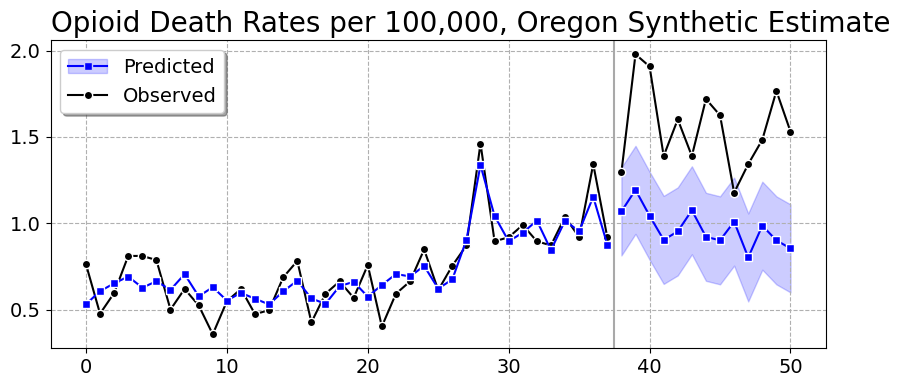

In [4]:
# Instant Graph
oregon.graph('Opioid Death Rates per 100,000, Oregon Synthetic Estimate')

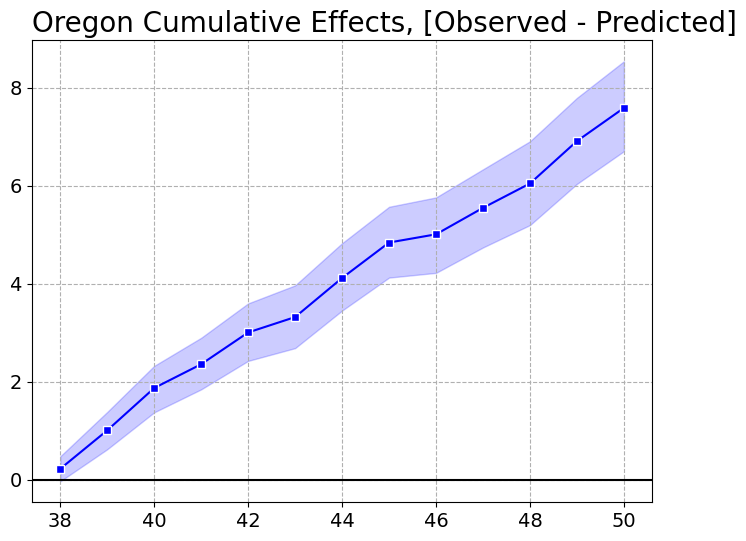

In [5]:
# Cumulative Trends Graph
oregon.cumgraph('Oregon Cumulative Effects, [Observed - Predicted]')

In [6]:
# Now can do the same analysis for Washington
wa_data = wide.drop('Oregon', axis=1)
wash = LassoSynth.Synth(wa_data,'Washington',39)

wash.suggest_alpha() # alpha is suggested to be much lower, result will not be as sparse

Suggested alpha is 0.004429860071730266


In [7]:
# Fit and comparison states
wash.fit()
wash.weights_table()

{'RMSE': 0.07978224834000704, 'RSquare': 0.9234385162049668}


,Group,Coef
0,Intercept,0.126856
1,South Carolina,0.198095
2,Mississippi,0.104043
3,Arizona,0.052849
4,Vermont,0.051806
5,Tennessee,0.037609
6,Colorado,0.037411
7,Alaska,0.034652
8,Kentucky,0.023963
9,Florida,0.021501


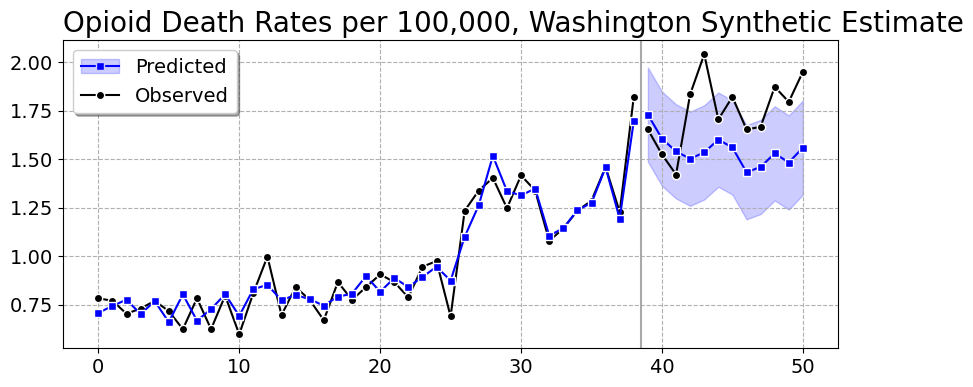

In [8]:
# Instant Effects
wash.graph('Opioid Death Rates per 100,000, Washington Synthetic Estimate')

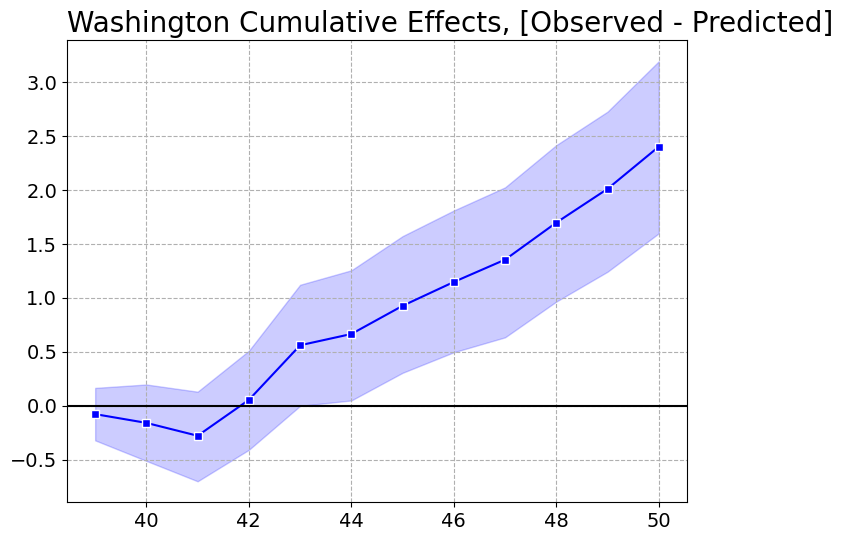

In [9]:
# Cum Effects
wash.cumgraph('Washington Cumulative Effects, [Observed - Predicted]')